In [ ]:
from google.colab import files
uploaded = files.upload()

Saving smoke_detection_iot.csv to smoke_detection_iot.csv


Feature Description  
(1)- UTC : The time when experiment was performed.   
(2)- Temperature : Temperature of Surroundings. Measured in Celsius.  
(3)- Humidity : The air humidity during the experiment.  
(4)- TVOC : Total Volatile Organic Compounds. Measured in ppb (parts per billion).   
(5)- eCo2 : CO2 equivalent concentration. Measured in ppm (parts per million).  
(6)- Raw H2 : The amount of Raw Hydrogen present in the surroundings.  
(7)- Raw Ethanol : The amount of Raw Ethanol present in the surroundings.  
(8)- Pressure : Air pressure. Measured in hPa.   
(9)- PM1.0 : Paticulate matter of diameter less than 1.0 micrometer.   
(10)- PM2.5 : Paticulate matter of diameter less than 2.5 micrometer.   
(11)- NC0.5 : Concentration of particulate matter of diameter less than 0.5 micrometers.   
(12)- NC1.0 : Concentration of particulate matter of diameter less than 1.0 micrometers.   
(13)- NC2.5 : Concentration of particulate matter of diameter less than 2.5 micrometers.   
(14)- CNT : Simple Count.   
(15)- Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 


In [ ]:
df= pd.read_csv('smoke_detection_iot.csv')

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
df.shape

(62630, 16)

In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
df.shape

(62630, 15)

In [ ]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [ ]:
# check null values

In [ ]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw_H2            0
Raw_Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire_Alarm        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw_H2          62630 non-null  int64  
 6   Raw_Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire_Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm']


In [ ]:
print(round(df[numerical].describe()),2)

                UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
count  6.263000e+04         62630.0      62630.0    62630.0    62630.0   
mean   1.654792e+09            16.0         49.0     1942.0      670.0   
std    1.100020e+05            14.0          9.0     7812.0     1906.0   
min    1.654712e+09           -22.0         11.0        0.0      400.0   
25%    1.654743e+09            11.0         48.0      130.0      400.0   
50%    1.654762e+09            20.0         50.0      981.0      400.0   
75%    1.654778e+09            25.0         53.0     1189.0      438.0   
max    1.655130e+09            60.0         75.0    60000.0    60000.0   

        Raw_H2  Raw_Ethanol  Pressure[hPa]    PM1.0    PM2.5    NC0.5  \
count  62630.0      62630.0        62630.0  62630.0  62630.0  62630.0   
mean   12942.0      19754.0          939.0    101.0    184.0    491.0   
std      272.0        610.0            1.0    923.0   1976.0   4266.0   
min    10668.0      15317.0          931.

In [ ]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm'],
      dtype='object')

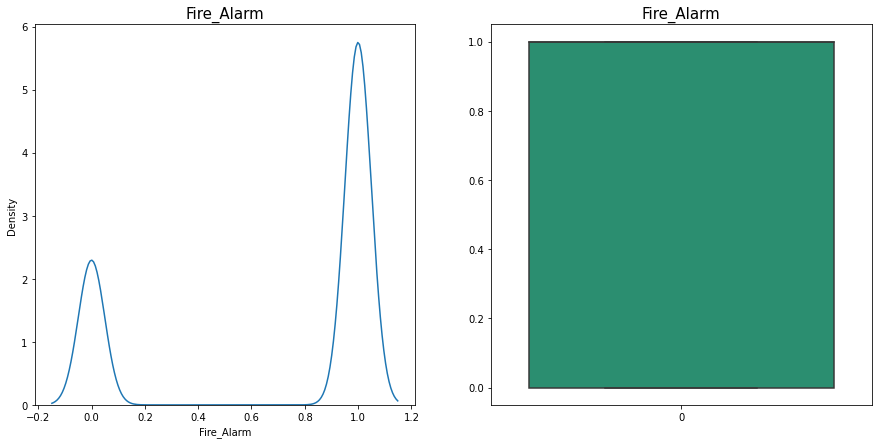

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Fire_Alarm", fontsize=15)
sns.kdeplot(data = df["Fire_Alarm"])
plt.subplot(1,2,2)
plt.title("Fire_Alarm", fontsize=15)
sns.boxplot(data = df["Fire_Alarm"], palette="Dark2")
plt.show()

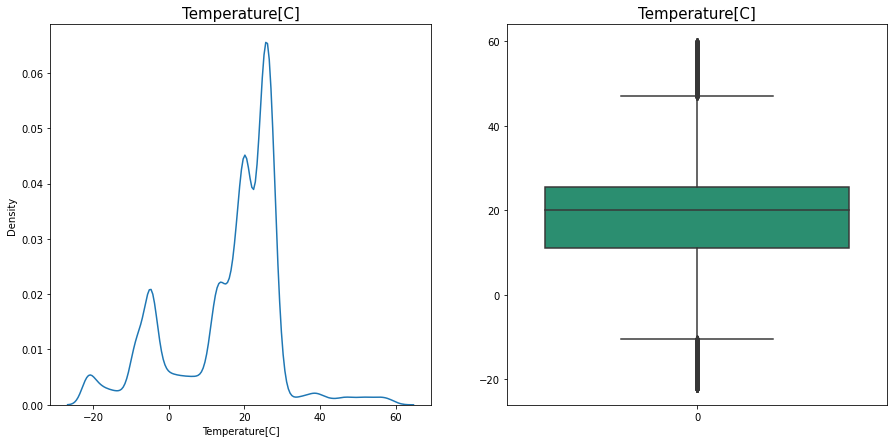

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Temperature[C]", fontsize=15)
sns.kdeplot(data = df["Temperature[C]"])
plt.subplot(1,2,2)
plt.title("Temperature[C]", fontsize=15)
sns.boxplot(data = df["Temperature[C]"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["Temperature[C]"].quantile(0.25)
q2 = df["Temperature[C]"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["Temperature[C]"] > max_limit, max_limit, 
         (np.where(df["Temperature[C]"] < min_limit, min_limit, df["Temperature[C]"]))), columns=["Temperature[C]"])

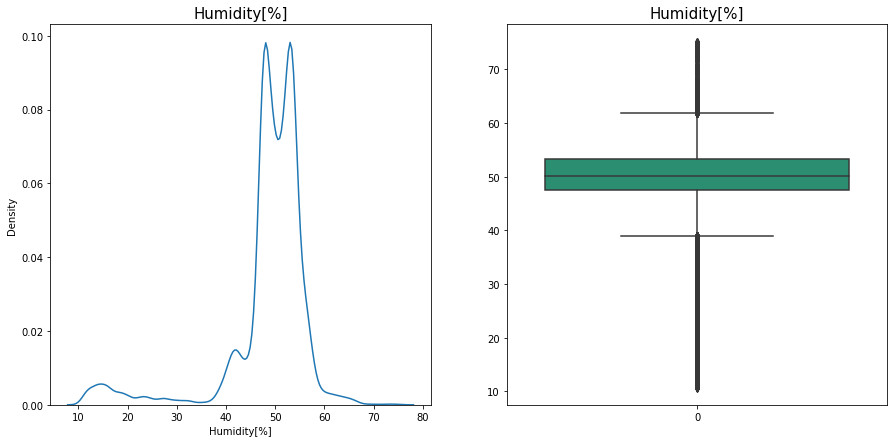

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Humidity[%]", fontsize=15)
sns.kdeplot(data = df["Humidity[%]"])
plt.subplot(1,2,2)
plt.title("Humidity[%]", fontsize=15)
sns.boxplot(data = df["Humidity[%]"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["Humidity[%]"].quantile(0.25)
q2 = df["Humidity[%]"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["Humidity[%]"] > max_limit, max_limit, 
         (np.where(df["Humidity[%]"] < min_limit, min_limit, df["Humidity[%]"]))), columns=["Humidity[%]"])

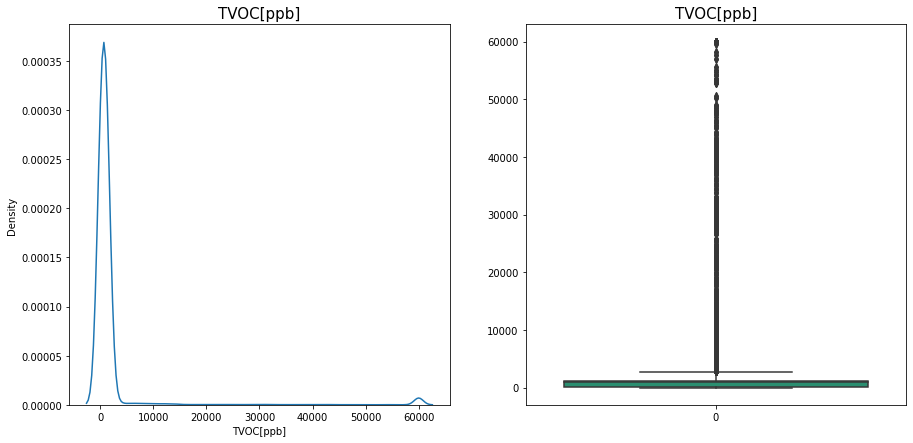

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("TVOC[ppb]", fontsize=15)
sns.kdeplot(data = df["TVOC[ppb]"])
plt.subplot(1,2,2)
plt.title("TVOC[ppb]", fontsize=15)
sns.boxplot(data = df["TVOC[ppb]"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["TVOC[ppb]"].quantile(0.25)
q2 = df["TVOC[ppb]"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["TVOC[ppb]"] > max_limit, max_limit, 
         (np.where(df["TVOC[ppb]"] < min_limit, min_limit, df["TVOC[ppb]"]))), columns=["TVOC[ppb]"])

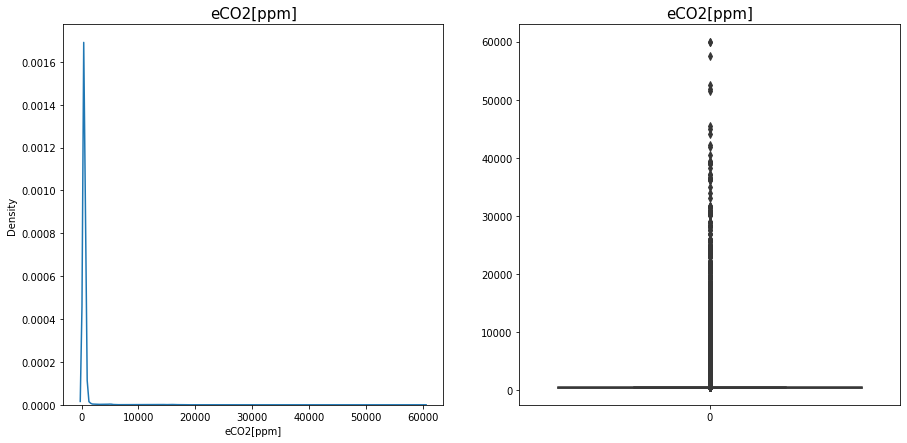

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("eCO2[ppm]", fontsize=15)
sns.kdeplot(data = df["eCO2[ppm]"])
plt.subplot(1,2,2)
plt.title("eCO2[ppm]", fontsize=15)
sns.boxplot(data = df["eCO2[ppm]"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["eCO2[ppm]"].quantile(0.25)
q2 = df["eCO2[ppm]"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["eCO2[ppm]"] > max_limit, max_limit, 
         (np.where(df["eCO2[ppm]"] < min_limit, min_limit, df["eCO2[ppm]"]))), columns=["eCO2[ppm]"])

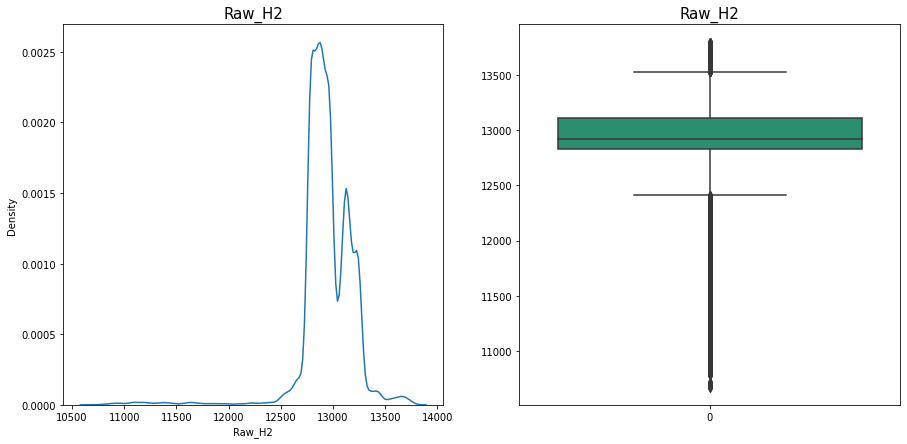

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Raw_H2", fontsize=15)
sns.kdeplot(data = df["Raw_H2"])
plt.subplot(1,2,2)
plt.title("Raw_H2", fontsize=15)
sns.boxplot(data = df["Raw_H2"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["Raw_H2"].quantile(0.25)
q2 = df["Raw_H2"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["Raw_H2"] > max_limit, max_limit, 
         (np.where(df["Raw_H2"] < min_limit, min_limit, df["Raw_H2"]))), columns=["Raw_H2"])

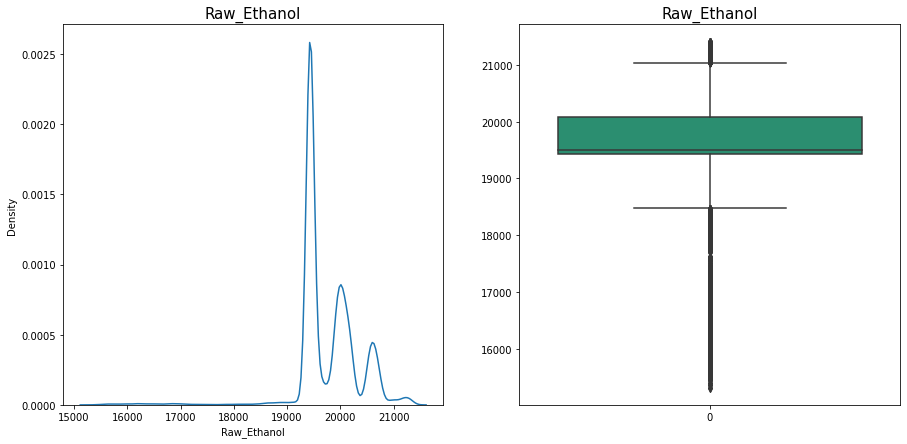

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Raw_Ethanol", fontsize=15)
sns.kdeplot(data = df["Raw_Ethanol"])
plt.subplot(1,2,2)
plt.title("Raw_Ethanol", fontsize=15)
sns.boxplot(data = df["Raw_Ethanol"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["Raw_Ethanol"].quantile(0.25)
q2 = df["Raw_Ethanol"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["Raw_Ethanol"] > max_limit, max_limit, 
         (np.where(df["Raw_Ethanol"] < min_limit, min_limit, df["Raw_Ethanol"]))), columns=["Raw_Ethanol"])

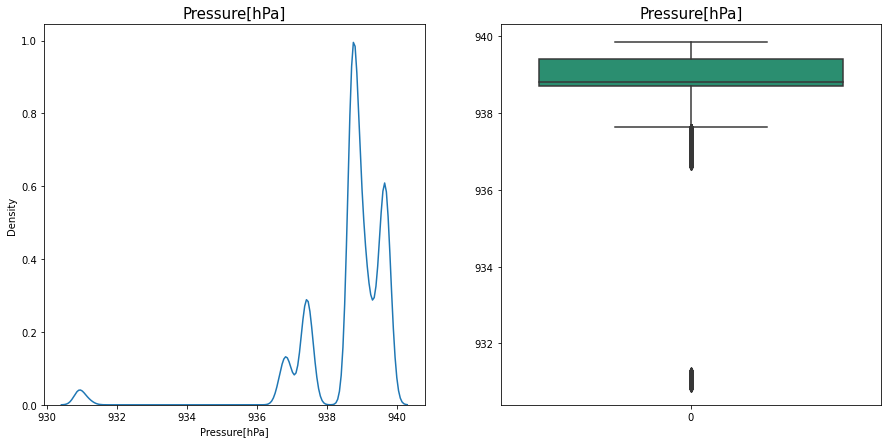

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Pressure[hPa]", fontsize=15)
sns.kdeplot(data = df["Pressure[hPa]"])
plt.subplot(1,2,2)
plt.title("Pressure[hPa]", fontsize=15)
sns.boxplot(data = df["Pressure[hPa]"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["Pressure[hPa]"].quantile(0.25)
q2 = df["Pressure[hPa]"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["Pressure[hPa]"] > max_limit, max_limit, 
         (np.where(df["Pressure[hPa]"] < min_limit, min_limit, df["Pressure[hPa]"]))), columns=["Pressure[hPa]"])

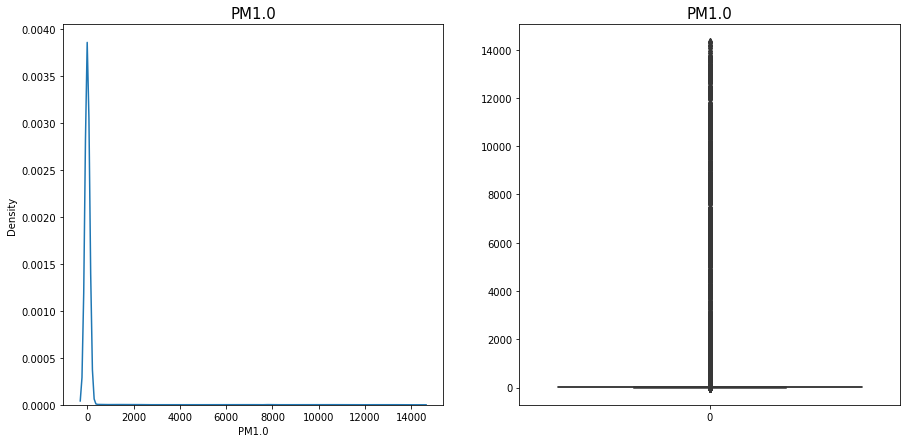

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("PM1.0", fontsize=15)
sns.kdeplot(data = df["PM1.0"])
plt.subplot(1,2,2)
plt.title("PM1.0", fontsize=15)
sns.boxplot(data = df["PM1.0"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["PM1.0"].quantile(0.25)
q2 = df["PM1.0"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["PM1.0"] > max_limit, max_limit, 
         (np.where(df["PM1.0"] < min_limit, min_limit, df["PM1.0"]))), columns=["PM1.0"])

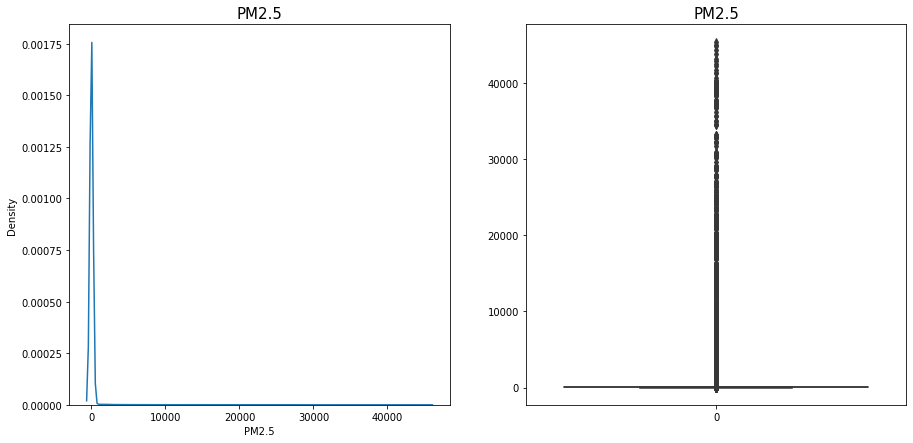

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("PM2.5", fontsize=15)
sns.kdeplot(data = df["PM2.5"])
plt.subplot(1,2,2)
plt.title("PM2.5", fontsize=15)
sns.boxplot(data = df["PM2.5"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["PM2.5"].quantile(0.25)
q2 = df["PM2.5"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["PM2.5"] > max_limit, max_limit, 
         (np.where(df["PM2.5"] < min_limit, min_limit, df["PM2.5"]))), columns=["PM2.5"])

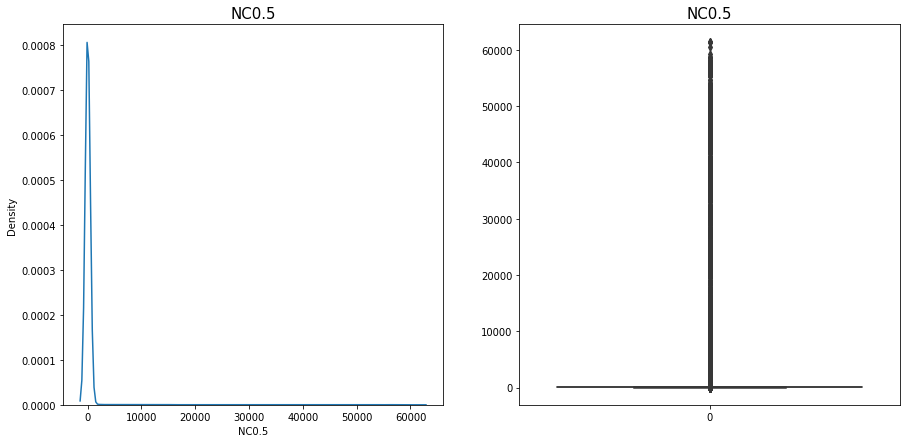

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("NC0.5", fontsize=15)
sns.kdeplot(data = df["NC0.5"])
plt.subplot(1,2,2)
plt.title("NC0.5", fontsize=15)
sns.boxplot(data = df["NC0.5"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["NC0.5"].quantile(0.25)
q2 = df["NC0.5"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["NC0.5"] > max_limit, max_limit, 
         (np.where(df["NC0.5"] < min_limit, min_limit, df["NC0.5"]))), columns=["NC0.5"])

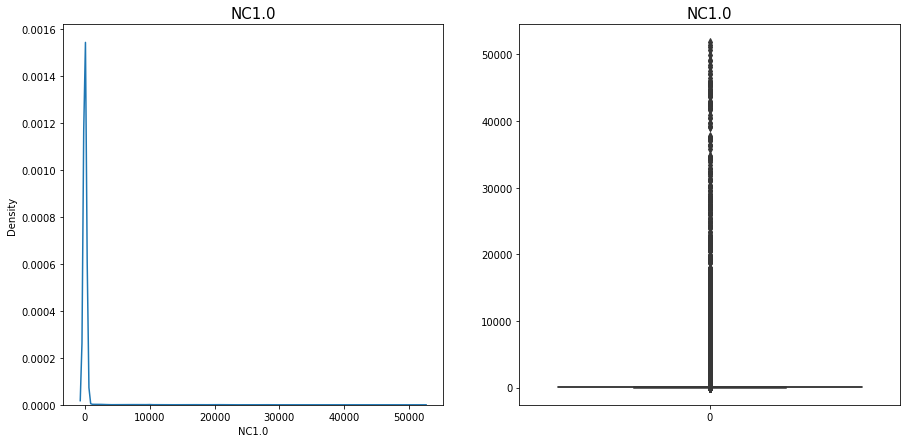

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("NC1.0", fontsize=15)
sns.kdeplot(data = df["NC1.0"])
plt.subplot(1,2,2)
plt.title("NC1.0", fontsize=15)
sns.boxplot(data = df["NC1.0"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["NC1.0"].quantile(0.25)
q2 = df["NC1.0"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["NC1.0"] > max_limit, max_limit, 
         (np.where(df["NC1.0"] < min_limit, min_limit, df["NC1.0"]))), columns=["NC1.0"])

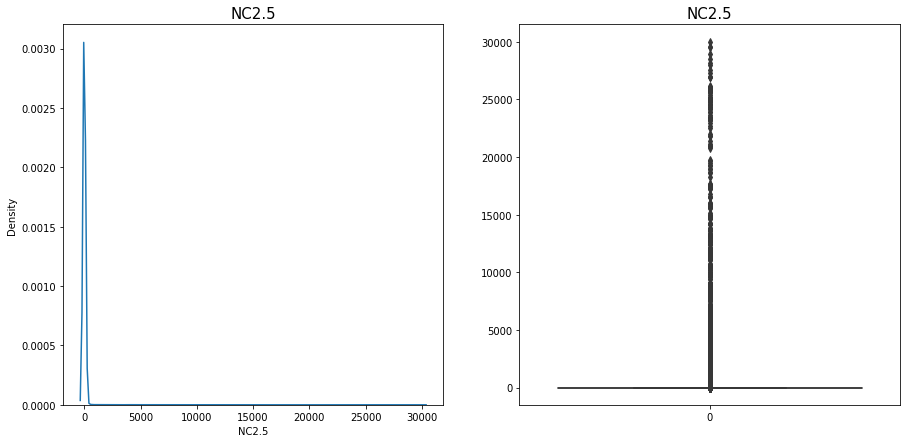

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("NC2.5", fontsize=15)
sns.kdeplot(data = df["NC2.5"])
plt.subplot(1,2,2)
plt.title("NC2.5", fontsize=15)
sns.boxplot(data = df["NC2.5"], palette="Dark2")
plt.show()

In [ ]:
q1 = df["NC2.5"].quantile(0.25)
q2 = df["NC2.5"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["NC2.5"] > max_limit, max_limit, 
         (np.where(df["NC2.5"] < min_limit, min_limit, df["NC2.5"]))), columns=["NC2.5"])

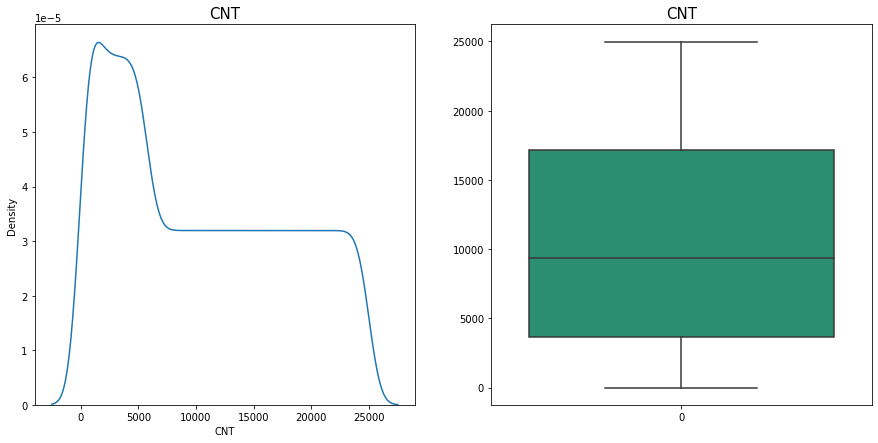

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("CNT", fontsize=15)
sns.kdeplot(data = df["CNT"])
plt.subplot(1,2,2)
plt.title("CNT", fontsize=15)
sns.boxplot(data = df["CNT"], palette="Dark2")
plt.show()

15


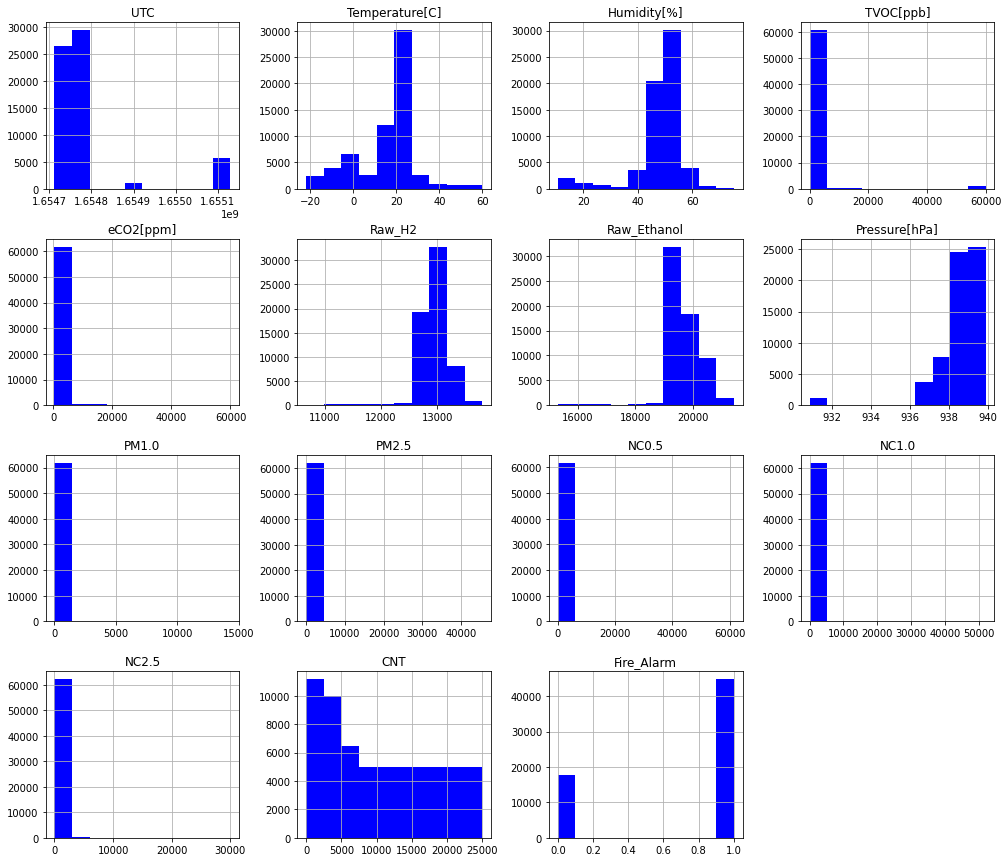

In [ ]:
pltdf = df.select_dtypes(include = np.number)
print(len(pltdf.columns))
pltdf.columns
pltdf.hist(figsize=(17,15), color = 'b')
plt.show()

In [ ]:
df['Fire_Alarm'].value_counts()

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

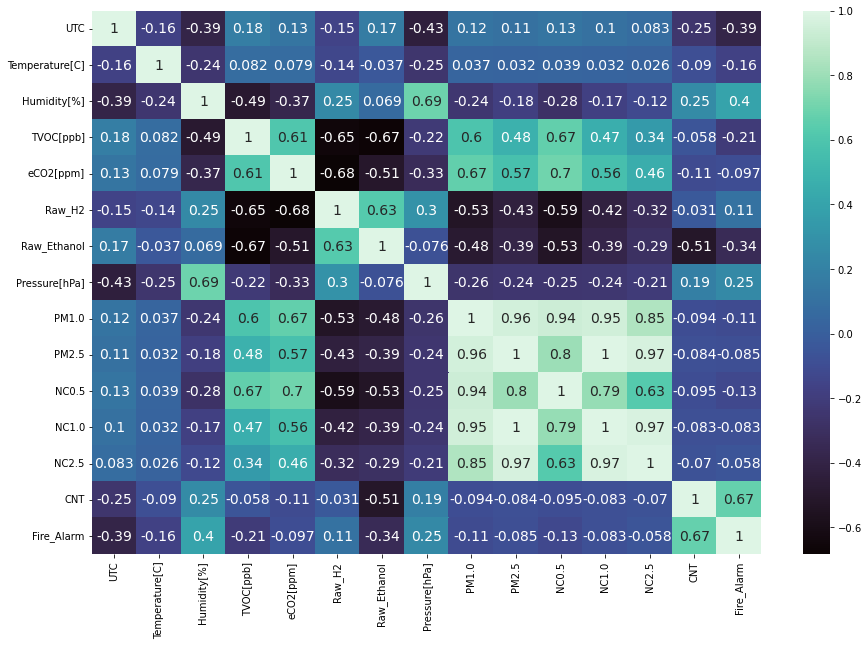

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="mako", annot_kws={"size":14})

In [ ]:
# seperating independant and dependant features
X= df.iloc[:,0:14]

In [ ]:
y= df.iloc[:,14]

In [ ]:
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
X.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT'],
      dtype='object')

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire_Alarm, dtype: int64

In [ ]:
# To know which feature is most important.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.16127964 0.02371708 0.04127115 0.03271275 0.00093128 0.00667524
 0.03004861 0.21659144 0.00718168 0.00765158 0.00331398 0.00192072
 0.00312141 0.46358344]


In [ ]:
# lets plot the important features.

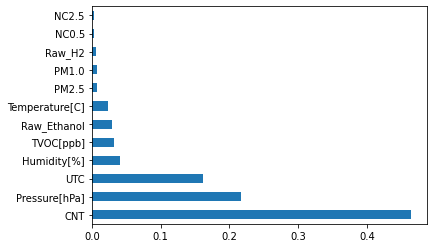

In [ ]:
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
# Standardize the data using the anyone of the scalers provided by sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm'],
      dtype='object')

In [ ]:
MM_Scaler = MinMaxScaler()
df1= df[['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm']]
Columns = df1.columns
df2 =MM_Scaler.fit_transform(df1)

In [ ]:
df2

array([[5.06001953e-02, 5.12692214e-01, 7.23239218e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.06025884e-02, 5.12875275e-01, 7.12534905e-01, ...,
        0.00000000e+00, 4.00112031e-05, 0.00000000e+00],
       [5.06049815e-02, 5.13046131e-01, 7.01520323e-01, ...,
        0.00000000e+00, 8.00224063e-05, 0.00000000e+00],
       ...,
       [9.99995214e-01, 4.98865023e-01, 7.91188334e-02, ...,
        4.66255771e-07, 2.29704317e-01, 0.00000000e+00],
       [9.99997607e-01, 5.01501098e-01, 8.22215327e-02, ...,
        4.66255771e-07, 2.29744328e-01, 0.00000000e+00],
       [1.00000000e+00, 5.04137174e-01, 8.96680112e-02, ...,
        4.66255771e-07, 2.29784340e-01, 0.00000000e+00]])

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_train=df1["Fire_Alarm"]
X_train=df1.drop(columns="Fire_Alarm")

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (43841, 14)
Test dataset shape (43841,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logi_Reg = LogisticRegression()

In [ ]:
LR_Model = Logi_Reg.fit(X_train, y_train)
Logi_Pred = LR_Model.predict(X_test)
Logi_Pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
pd.crosstab(y_test, Logi_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,1,All
Actual,,
0,5508,5508
1,13281,13281
All,18789,18789


In [ ]:
confusion_matrix(y_test, Logi_Pred)

array([[    0,  5508],
       [    0, 13281]])

In [ ]:
# classification_report

print(classification_report(y_test, Logi_Pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5508
           1       0.71      1.00      0.83     13281

    accuracy                           0.71     18789
   macro avg       0.35      0.50      0.41     18789
weighted avg       0.50      0.71      0.59     18789



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# accuracy_score
Logi_accuracy = accuracy_score(y_test, Logi_Pred)
Logi_accuracy

0.7068497525147692

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
actual1 = np.repeat([1, 0], repeats=[5420, 4580])

pred1 = np.repeat([1, 0, 1, 0], repeats=[4205, 1215,3053, 1527])

In [ ]:
Logi_F1= f1_score(actual1,pred1)
Logi_F1

0.6633538412998896

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.59


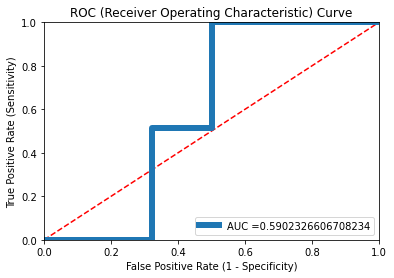

In [ ]:
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model=RandomForestClassifier(random_state=1,n_estimators=300,class_weight='balanced',criterion='gini',
                    min_samples_leaf=5,
                       min_samples_split=10)
RandomForest_model.fit(X_train,y_train)
Ran_accuracy=RandomForest_model.score(X_test,y_test)
accuracy1 =RandomForest_model.score(X_train,y_train) 
print(Ran_accuracy,accuracy1)

0.9998403321092129 0.9999315709039484


In [ ]:
Ran_Model = RandomForest_model.fit(X_train, y_train)
Ran_prd = RandomForest_model.predict(X_test)
pd.crosstab(y_test, Ran_prd, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,5508,0,5508
1,3,13278,13281
All,5511,13278,18789


In [ ]:
confusion_matrix(y_test, Ran_prd)

array([[ 5508,     0],
       [    3, 13278]])

In [ ]:
print(classification_report(y_test, Ran_prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5508
           1       1.00      1.00      1.00     13281

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [ ]:
actual1 = np.repeat([1,0], repeats=[5420, 4580])
pred1 = np.repeat([1, 0, 1, 0], repeats=[3252, 2046,2843, 1859])

RAN_F1= f1_score(actual1,pred1)
RAN_F1

0.5860182370820669

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Dt_accuracy=DecisionTree_model.score(X_test,y_test)
accuracy1 =DecisionTree_model.score(X_train,y_train) 
print(Dec_accuracy,accuracy1)

0.9997871094789504 1.0


In [ ]:
Dt_accuracy

0.9997871094789504

In [ ]:
Dt_Model = DecisionTree_model.fit(X_train, y_train)
Dt_pre = DecisionTree_model.predict(X_test)

In [ ]:
Dt_pre

array([1, 1, 0, ..., 0, 0, 1])

AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada_Model = Ada.fit(X_train, y_train)
Ada_Pred = Ada_Model.predict(X_test) 
Ada_Pred

array([1, 1, 0, ..., 0, 0, 1])

Confusion_matrix

In [ ]:
pd.crosstab(y_test, Ada_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,5508,0,5508
1,2,13279,13281
All,5510,13279,18789


In [ ]:
confusion_matrix(y_test, Ada_Pred)

array([[ 5508,     0],
       [    2, 13279]])

Classification_report

In [ ]:
print(classification_report(y_test, Ada_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5508
           1       1.00      1.00      1.00     13281

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [ ]:
Ada_accuracy = accuracy_score(y_test, Ada_Pred)
Ada_accuracy

0.9998935547394753

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_predS = model.predict(X_train)
GradientBoost_accuracy= metrics.accuracy_score(y_test, y_pred)
GradientBoost_train = metrics.accuracy_score(y_train, y_predS)
print(GradientBoost_accuracy,GradientBoost_train)

0.9988291021342275 0.9988367053671221


In [135]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB_Model = NB.fit(X_train, y_train)

NB_Pred = NB_Model.predict(X_test)

NB_Pred

array([1, 1, 1, ..., 1, 0, 1])

In [136]:
pd.crosstab(y_test, NB_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

confusion_matrix(y_test, NB_Pred)

array([[ 2481,  3027],
       [  345, 12936]])

In [137]:
print(classification_report(y_test, NB_Pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60      5508
           1       0.81      0.97      0.88     13281

    accuracy                           0.82     18789
   macro avg       0.84      0.71      0.74     18789
weighted avg       0.83      0.82      0.80     18789



In [138]:
NB_accuracy = accuracy_score(y_test, NB_Pred)
NB_accuracy

0.8205332907552291

In [141]:
y_predict1 = NB_Model.predict_proba(X)
y_predict1[:, 1]
plt.show()

In [142]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_predict1[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.974


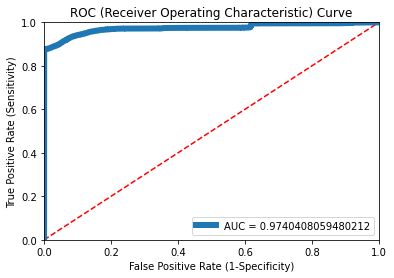

In [143]:
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN_Model = KNN.fit(X_train, y_train)

In [145]:
KNN_Pred = KNN_Model.predict(X_test)
KNN_Pred

array([1, 1, 0, ..., 0, 0, 1])

In [146]:
pd.crosstab(y_test, KNN_Pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,5505,3,5508
1,1,13280,13281
All,5506,13283,18789


In [147]:
confusion_matrix(y_test, KNN_Pred)

array([[ 5505,     3],
       [    1, 13280]])

In [148]:
KNN_accuracy = accuracy_score(y_test, KNN_Pred)
KNN_accuracy

0.9997871094789504

In [150]:
y_predict2 = KNN_Model.predict_proba(X)
y_predict2[:,1]
plt.show()

In [151]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_predict2[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  1.0


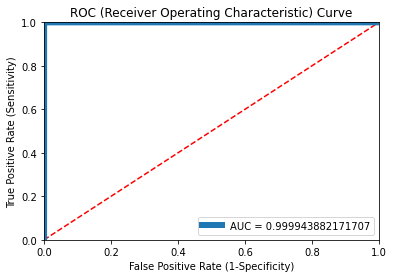

In [152]:
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

In [153]:
Accuracy_Comp_bank = pd.DataFrame({'Classification Model' : ['LOGISTIC', 'ADABOOST',"RANDOM_FOREST","DECISSION_TREE",
                                                           'NAIVE-BAYES', 'GRADIENT_BOOST', 'KNN'],
                           'Accuracy' : [Logi_accuracy,Ada_accuracy,Ran_accuracy,Dec_accuracy,NB_accuracy,GradientBoost_accuracy,KNN_accuracy]})

In [154]:
Accuracy_Comp_bank

,Classification Model,Accuracy
0,LOGISTIC,0.706850
1,ADABOOST,0.999894
2,RANDOM_FOREST,0.999840
3,DECISSION_TREE,0.999787
4,NAIVE-BAYES,0.820533
5,GRADIENT_BOOST,0.998829
6,KNN,0.999787


In [155]:
Accuracy_Comp_bank.sort_values(by ="Accuracy")

,Classification Model,Accuracy
0,LOGISTIC,0.706850
4,NAIVE-BAYES,0.820533
5,GRADIENT_BOOST,0.998829
3,DECISSION_TREE,0.999787
6,KNN,0.999787
2,RANDOM_FOREST,0.999840
1,ADABOOST,0.999894


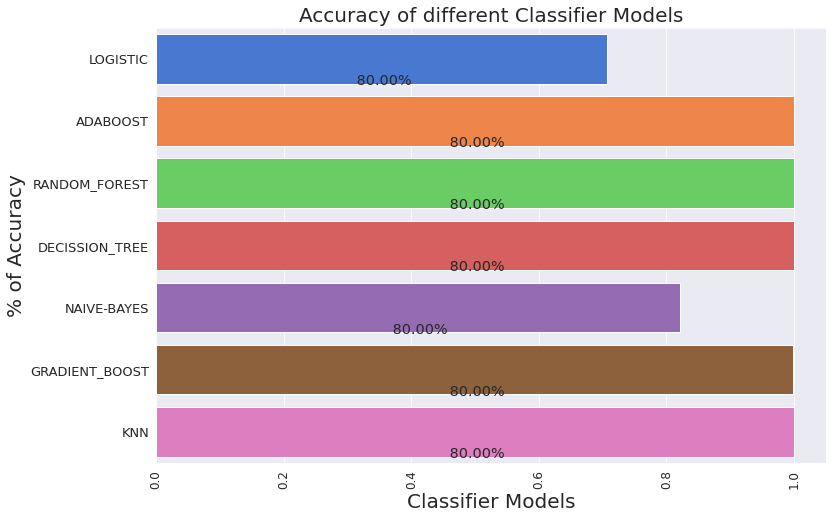

In [156]:
list_acc = ['LOGISTIC', 'ADABOOST',"RANDOM_FOREST","DECISSION_TREE",
                                                           'NAIVE-BAYES', 'GRADIENT_BOOST', 'KNN']
list1 = [Logi_accuracy,Ada_accuracy,Ran_accuracy,Dec_accuracy,NB_accuracy,GradientBoost_accuracy,KNN_accuracy]

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
ax = sns.barplot(x = list1, y = list_acc, palette = 'muted', saturation = 1.5)
plt.xlabel('Classifier Models', fontsize = 20)
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height : .2%}', (x + width/2, y + height*1.02), ha = 'center', fontsize = 'x-large')

plt.show()